*Теоретический материал:* https://youtu.be/kpPUmKI04GI?t=203

*Разбор данного раздела:* https://youtu.be/kpPUmKI04GI?t=585

# Import библиотек


**Загрузка основных библиотек и дополнительных модулей**

In [ ]:
%matplotlib inline

#Автоматическая перезагрузка модулей при их изменении/обновлении 
%load_ext autoreload
%autoreload 2

#Импортируем keras и инструменты keras_retinanet
import keras
from google.colab import files
#И другие необходимые библиотеки
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
import sys

Using TensorFlow backend.


# Загрузка файлов

In [ ]:
files.upload()

Saving friends.jpg to friends.jpg


{'friends.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x13\x13\x12\x15\x15\x15\x16\x15\x15\x17\x18\x17\x17\x15\x17\x16\x15\x15\x15\x17\x15\x17\x16\x15\x15\x18\x17\x18\x1d( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-%\x1f%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x14\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02\x03\x04\x06\x01\x07\xff\xc4\x009\x10\x00\x01\x03\x02\x04\x03\x06\x06\x01\x03\x04\x02\x03\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x05\x121AQa\x06\x13"q\x81\x912\xa1\xb1\xc1\xd1\xf0\xf1\x14B\xe1\x073Rb\x82\xb2\x15\x16#\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\x06\xff\xc4\x00#\x11\x00\x02\x02\x02\x03\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121A\x04Q\x

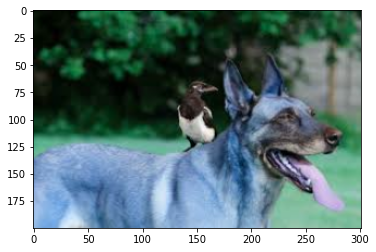

In [ ]:
#Читаем изображение с помощью OpenCV
im = cv2.imread('friends.jpg')
    
#Задаём желаемые размеры изображения
newHeight = 200                             #указываем высоту
newWidth = int(im.shape[1]*200/im.shape[0]) #пропорционально этому меняем ширину
im = cv2.resize(im, (newWidth, newHeight))  #применяем заданные размеры к изображению
#Выводим исходную картинку
%matplotlib inline
plt.imshow(im)
plt.show()

# Selective Search(селективный поиск)

In [ ]:
#Подключаем режим мультипроцессорности для более быстрой работы алгоритма
cv2.setUseOptimized(True) #активируем режим оптимизации
cv2.setNumThreads(8)      #задаем количество потоков

In [ ]:
# Создаем Объект Selective Search Segmentation
sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# Передаем алгоритму картинку
sss.setBaseImage(im)
  
# Выбираем медленный, но более точный метод (по умолчанию работает метод Fast)
sss.switchToSelectiveSearchQuality()

# Запускаем selective search segmentation на переданном изображении
rects = sss.process() #результат вернётся в виде прямоугольников внутри которых предположительно находятся объекты
print(rects.shape) #выводим количество прямоугольников

(1460, 4)


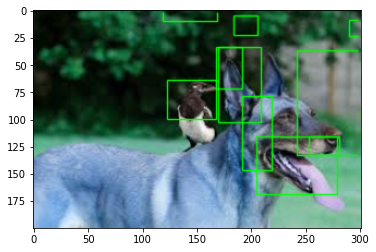

In [ ]:
#Задаём способы обработки изображения

numShowRects = 10 #кол-во region proposals (прямоугольников, описывающих объект)

imOut = im.copy() #создаем копию исходной картинки

for i, rect in enumerate(rects): #проходим по каждому прямоугольнику
  if (i < numShowRects): #пока не наберётся заданное кол-во прямоугольников
    x, y, w, h = rect      # x,y - координаты точки вершины; w, h - шаги от вершины вправо, вниз
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA) #метод нарисует на изображении прямоугольник по указанным параметрам
  else: #если кол-во прямоугольников превысит заданное
    break #то останавливаемся

#Взглянем на результаты
plt.imshow(imOut) 
plt.show()